In [1]:
# Multilinear Regression
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the data
cars = pd.read_csv('Cars (1).csv')

In [3]:
cars.head(10)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [4]:
# Correlation matrix 
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


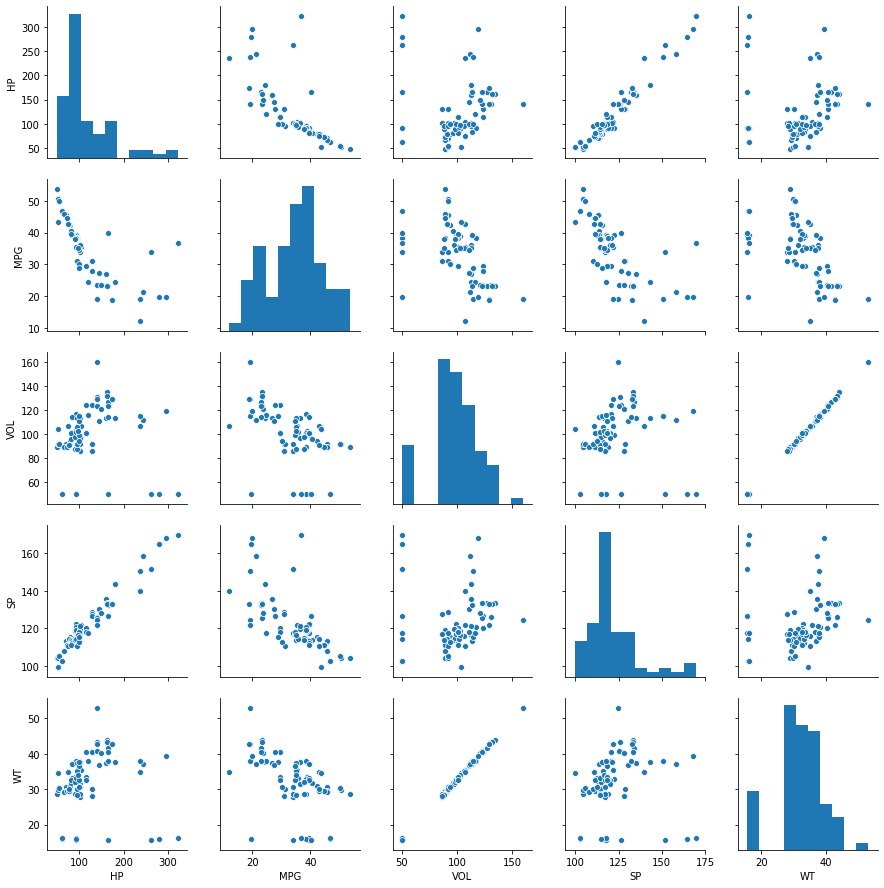

In [5]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(cars)

In [6]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
# Preparing model                  
ml1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit() # regression model

In [7]:
# Getting coefficients of variables               
ml1.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [8]:
MPG1 = 30.677336 + (0.400574*28.762059) + (-0.336051 * 89) + (0.395627 * 104.185353) + (-0.205444 * 49)

In [9]:
MPG1

43.441912673197

In [10]:
# Summary
ml1.summary()
# p-values for WT,VOL are more than 0.05 and also we know that [WT,VOL] has high correlation value 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.54e-23
Time:                        22:09:20   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
import pandas as pd
import numpy as np
# import seaborn as sb
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

from sklearn import metrics

#Importing Data
claimants = pd.read_csv('claimants.csv')

In [12]:
claimants.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350
